In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
coordinates

[(56.33322396739632, 34.57147184476571),
 (-32.273562336729874, -151.50483947447594),
 (20.56571835181721, 1.524076373810118),
 (69.69135703924746, -110.48882501617766),
 (-5.628466537583321, -62.4973816292741),
 (-85.90714753762934, -16.785360330639577),
 (-12.510453150359112, 27.53921581871694),
 (56.85890325676192, -118.32695313075472),
 (32.24107170658597, 146.5738705374087),
 (68.50608145782277, -146.58003821916583),
 (-37.13225439776389, -58.53967748692325),
 (-49.275812495549985, 26.000300952693607),
 (49.71153910692411, -58.724456135173014),
 (-18.13943631147545, 99.23785089377401),
 (-3.9840941816601685, -145.8018641469007),
 (0.5896659602943259, -172.815450800224),
 (-59.56662818063161, -106.39241531706325),
 (-4.025477074486602, -9.30193135834918),
 (53.26022907028636, 24.17133173823356),
 (-27.650548019868552, 138.9636957775195),
 (-84.87231051457724, -111.46178607079992),
 (24.456687685911135, 168.2012241091403),
 (-75.192898649818, -83.10941605720191),
 (-31.9764635433198

In [5]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [6]:
from citipy import citipy

In [7]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

zubtsov ru
mataura pf
tessalit ml
yellowknife ca
tapaua br
ushuaia ar
chingola zm
fairview ca
hasaki jp
fairbanks us
tandil ar
kruisfontein za
corner brook ca
palabuhanratu id
atuona pf
saleaula ws
punta arenas cl
georgetown sh
vawkavysk by
broken hill au
punta arenas cl
butaritari ki
punta arenas cl
esperance au
kapaa us
jardim br
upernavik gl
albany au
codrington ag
vila vu
busselton au
kapaa us
mataura pf
vadinsk ru
carnarvon au
rikitea pf
anadyr ru
clyde river ca
rikitea pf
ust-ishim ru
ancud cl
tezu in
hanmer springs nz
butaritari ki
mrirt ma
shelburne ca
chokurdakh ru
port alfred za
east london za
rikitea pf
lagoa pt
ulaangom mn
teya ru
kapaa us
chokurdakh ru
laguna br
saskylakh ru
san patricio mx
port elizabeth za
berezayka ru
nadym ru
east london za
isernia it
saint anthony ca
huron us
faanui pf
filingue ne
georgetown sh
kodiak us
barentsburg sj
tommot ru
albany au
vacaville us
derzhavinsk kz
vrangel ru
tessalit ml
qaanaaq gl
sidi ali dz
sayanskiy ru
port alfred za
klaksvik fo


taolanaro mg
hilo us
mataura pf
avarua ck
kargil in
albany au
shitanjing cn
rikitea pf
san quintin mx
mataura pf
minot us
hami cn
taolanaro mg
ancud cl
vaini to
xai-xai mz
ler sd
hermanus za
arraial do cabo br
cam ranh vn
novikovo ru
montepuez mz
kapaa us
tecpan mx
kautokeino no
yellowknife ca
tasiilaq gl
eureka us
wolmaranstad za
barrow us
puerto ayora ec
carnarvon au
pahrump us
rikitea pf
qaanaaq gl
taolanaro mg
vaitupu wf
gizo sb
ostrovnoy ru
berlevag no
bengkulu id
severomorsk ru
acapulco mx
vaini to
atuona pf
kantabanji in
jamestown sh
okhotsk ru
ushuaia ar
kapaa us
raga sd
fort nelson ca
new norfolk au
georgetown sh
turukhansk ru
punta arenas cl
new norfolk au
punta arenas cl
kapaa us
ushuaia ar
didi lilo ge
tarko-sale ru
hofn is
pevek ru
montlucon fr
mahebourg mu
puerto ayora ec
olafsvik is
ushuaia ar
fort saint john ca
punta arenas cl
ahipara nz
adrar dz
buraydah sa
saint-philippe re
qaqortoq gl
kloulklubed pw
dikson ru
tasiilaq gl
leningradskiy ru
mataura pf
talnakh ru
hong ga

In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

595

In [9]:
import requests
from config import weather_api_key
from datetime import datetime

In [10]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [11]:
# Create an empty list to hold the weather data.
city_data = []

In [28]:
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
            print("City not found. Skipping...")
            pass
# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | zubtsov
Processing Record 2 of Set 1 | mataura
Processing Record 3 of Set 1 | tessalit
Processing Record 4 of Set 1 | yellowknife
Processing Record 5 of Set 1 | tapaua
City not found. Skipping...
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | chingola
Processing Record 8 of Set 1 | fairview
Processing Record 9 of Set 1 | hasaki
Processing Record 10 of Set 1 | fairbanks
Processing Record 11 of Set 1 | tandil
Processing Record 12 of Set 1 | kruisfontein
Processing Record 13 of Set 1 | corner brook
Processing Record 14 of Set 1 | palabuhanratu
City not found. Skipping...
Processing Record 15 of Set 1 | atuona
Processing Record 16 of Set 1 | saleaula
City not found. Skipping...
Processing Record 17 of Set 1 | punta arenas
Processing Record 18 of Set 1 | georgetown
Processing Record 19 of Set 1 | vawkavysk
Processing Record 20 of Set 1 | broken hill
Processing Record 21 of Set 1

Processing Record 35 of Set 4 | qaqortoq
Processing Record 36 of Set 4 | aklavik
Processing Record 37 of Set 4 | tivaouane
Processing Record 38 of Set 4 | cockburn town
Processing Record 39 of Set 4 | meulaboh
Processing Record 40 of Set 4 | veraval
Processing Record 41 of Set 4 | tura
Processing Record 42 of Set 4 | kavaratti
Processing Record 43 of Set 4 | cidreira
Processing Record 44 of Set 4 | saint george
Processing Record 45 of Set 4 | soe
Processing Record 46 of Set 4 | okhansk
Processing Record 47 of Set 4 | bhubaneswar
Processing Record 48 of Set 4 | yar-sale
Processing Record 49 of Set 4 | constitucion
Processing Record 50 of Set 4 | hithadhoo
Processing Record 1 of Set 5 | hay river
Processing Record 2 of Set 5 | hit
Processing Record 3 of Set 5 | mareeba
Processing Record 4 of Set 5 | thompson
Processing Record 5 of Set 5 | cabo san lucas
Processing Record 6 of Set 5 | nikolskoye
Processing Record 7 of Set 5 | nuuk
Processing Record 8 of Set 5 | sao joao da barra
Processin

Processing Record 26 of Set 8 | san quintin
Processing Record 27 of Set 8 | minot
Processing Record 28 of Set 8 | xai-xai
Processing Record 29 of Set 8 | ler
Processing Record 30 of Set 8 | cam ranh
Processing Record 31 of Set 8 | novikovo
Processing Record 32 of Set 8 | montepuez
Processing Record 33 of Set 8 | tecpan
Processing Record 34 of Set 8 | kautokeino
Processing Record 35 of Set 8 | eureka
Processing Record 36 of Set 8 | wolmaranstad
City not found. Skipping...
Processing Record 37 of Set 8 | pahrump
Processing Record 38 of Set 8 | gizo
Processing Record 39 of Set 8 | severomorsk
Processing Record 40 of Set 8 | acapulco
Processing Record 41 of Set 8 | kantabanji
Processing Record 42 of Set 8 | okhotsk
Processing Record 43 of Set 8 | raga
Processing Record 44 of Set 8 | fort nelson
Processing Record 45 of Set 8 | turukhansk
Processing Record 46 of Set 8 | didi lilo
Processing Record 47 of Set 8 | tarko-sale
Processing Record 48 of Set 8 | hofn
Processing Record 49 of Set 8 | m

Processing Record 15 of Set 12 | lasa
Processing Record 16 of Set 12 | arica
Processing Record 17 of Set 12 | qidong
Processing Record 18 of Set 12 | porto novo
Processing Record 19 of Set 12 | atasu
Processing Record 20 of Set 12 | burnie
Processing Record 21 of Set 12 | dauphin
Processing Record 22 of Set 12 | geraldton
Processing Record 23 of Set 12 | nayoro
Processing Record 24 of Set 12 | rantepao
Processing Record 25 of Set 12 | sobolevo
Processing Record 26 of Set 12 | almaznyy
Processing Record 27 of Set 12 | riohacha
Processing Record 28 of Set 12 | kalnibolotskaya
Processing Record 29 of Set 12 | menongue
Processing Record 30 of Set 12 | sorong
Processing Record 31 of Set 12 | chicama
Processing Record 32 of Set 12 | abu samrah
Processing Record 33 of Set 12 | colwyn bay
Processing Record 34 of Set 12 | sentyabrskiy
City not found. Skipping...
Processing Record 35 of Set 12 | stabat
Processing Record 36 of Set 12 | osypenko
Processing Record 37 of Set 12 | budakalasz
Processi

In [29]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Cap-Aux-Meules,47.3821,-61.8597,68.05,83,75,11.50,CA,2021-06-27 00:25:01
1,Cap-Aux-Meules,47.3821,-61.8597,66.25,82,75,6.91,CA,2021-06-27 01:30:11
2,Zubtsov,56.1753,34.5894,64.13,96,59,3.65,RU,2021-06-27 01:51:13
3,Mataura,-46.1927,168.8643,53.47,79,79,5.44,NZ,2021-06-27 01:51:14
4,Tessalit,20.1986,1.0114,92.39,9,0,7.76,ML,2021-06-27 01:51:14
5,Yellowknife,62.4560,-114.3525,77.56,33,20,19.57,CA,2021-06-27 01:46:18
6,Ushuaia,-54.8000,-68.3000,37.06,75,0,4.61,AR,2021-06-27 01:50:53
7,Chingola,-12.5290,27.8838,50.81,62,2,4.18,ZM,2021-06-27 01:51:15
8,Fairview,40.8126,-73.9990,79.39,80,1,10.00,US,2021-06-27 01:51:15
9,Hasaki,35.7333,140.8333,81.18,76,100,6.89,JP,2021-06-27 01:51:15


In [30]:
len(city_data)

549

In [38]:
city_data_arranged = city_data_df[["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]]
city_data_arranged

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Cap-Aux-Meules,CA,2021-06-27 00:25:01,47.3821,-61.8597,68.05,83,75,11.50
1,Cap-Aux-Meules,CA,2021-06-27 01:30:11,47.3821,-61.8597,66.25,82,75,6.91
2,Zubtsov,RU,2021-06-27 01:51:13,56.1753,34.5894,64.13,96,59,3.65
3,Mataura,NZ,2021-06-27 01:51:14,-46.1927,168.8643,53.47,79,79,5.44
4,Tessalit,ML,2021-06-27 01:51:14,20.1986,1.0114,92.39,9,0,7.76
...,...,...,...,...,...,...,...,...,...
544,North Platte,US,2021-06-27 01:53:53,41.1239,-100.7654,74.25,51,53,1.01
545,Isiro,CD,2021-06-27 01:53:53,2.7739,27.6160,68.54,84,96,2.59
546,Ukiah,US,2021-06-27 01:53:54,39.1502,-123.2078,104.02,23,1,9.22
547,Beringovskiy,RU,2021-06-27 01:53:54,63.0500,179.3167,41.16,89,100,4.21


In [45]:
# Create the output file (CSV).
output_data_file = "cities.csv"
# Export the City_Data into a CSV.
city_data_arranged.to_csv(output_data_file, index_label="City")

In [46]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_arranged["Lat"]
max_temps = city_data_arranged["Max Temp"]
humidity = city_data_arranged["Humidity"]
cloudiness = city_data_arranged["Cloudiness"]
wind_speed = city_data_arranged["Wind Speed"]

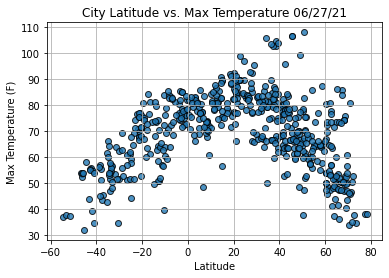

In [55]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")


# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("Fig1.png")

# Show plot.
plt.show()

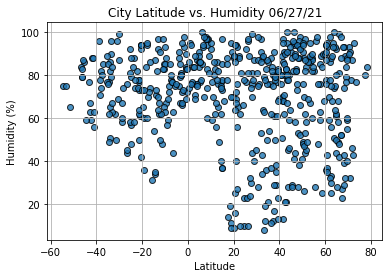

In [56]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Fig2.png")
# Show plot.
plt.show()

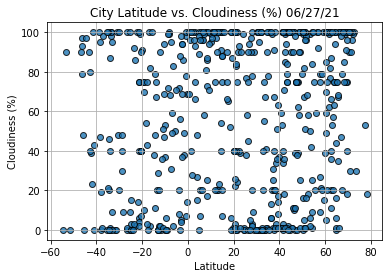

In [57]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Fig3.png")
# Show plot.
plt.show()

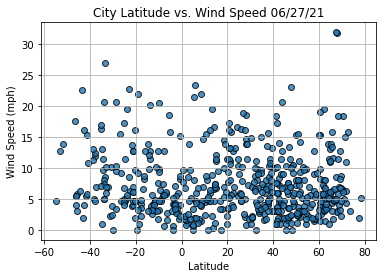

In [58]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Fig4.png")
# Show plot.
plt.show()